# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [88]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from scipy.io import loadmat

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

In [8]:
datos = loadmat("ejer_1_data1.mat")
datos

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

#### 3. Create a DataFrame with the features and target

In [9]:
X = pd.DataFrame(datos["X"])
y = pd.DataFrame(datos["y"])

In [16]:
y.rename(columns={0:"target"},inplace=True)

In [ ]:
df = pd.concat((X,y),axis=1)


In [25]:
df.rename(columns={0:"Var1",1:"Var2"},inplace=True)

#### 4. Plot a scatterplot with the data

<Axes: >

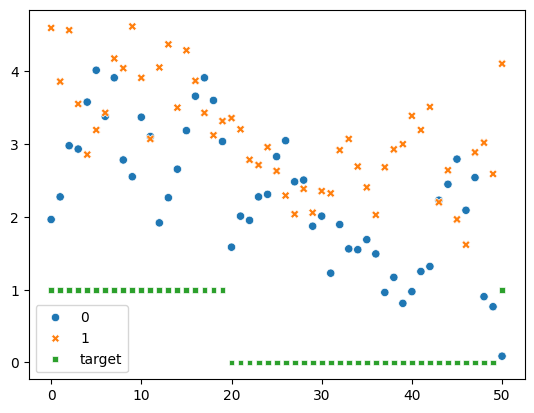

In [19]:
sns.scatterplot(df)

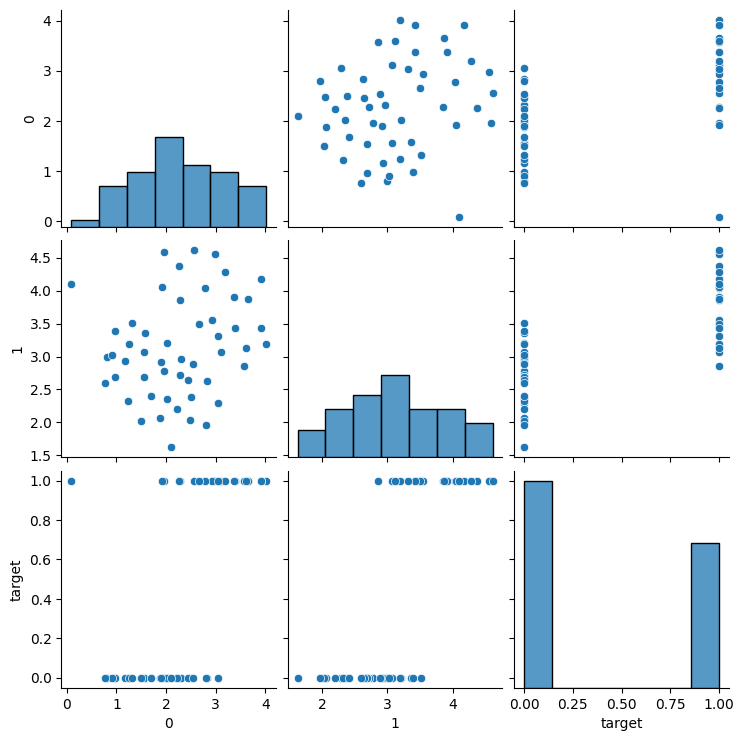

In [18]:
sns.pairplot(df)

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [96]:
Lsvc1 = LinearSVC(C=1, loss='hinge', max_iter=10000)

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [26]:
X = df[["Var1","Var2"]]
y = df["target"]

In [97]:
Lsvc1.fit (X,y)
pred = Lsvc1.predict(X)

In [28]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [106]:
Lsvc1.score(X,y)

0.9803921568627451

It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [85]:
Lsvc = LinearSVC(C=339, loss='hinge', max_iter=10000)


In [86]:
Lsvc.fit (X,y)
pred = Lsvc.predict(X)

c:\Users\rafac\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [87]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [107]:
Lsvc.score(X,y)

1.0

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

In [90]:
dec = Lsvc.decision_function(X)

<Axes: xlabel='Var1', ylabel='Var2'>

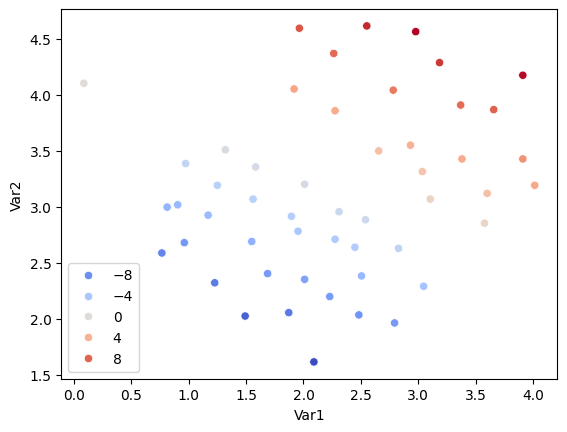

In [95]:
sns.scatterplot( x=X["Var1"],y=X["Var2"],hue= dec,palette = "coolwarm")

#### 9. Do the same with the second model

https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

In [98]:
dec = Lsvc1.decision_function(X)

<Axes: xlabel='Var1', ylabel='Var2'>

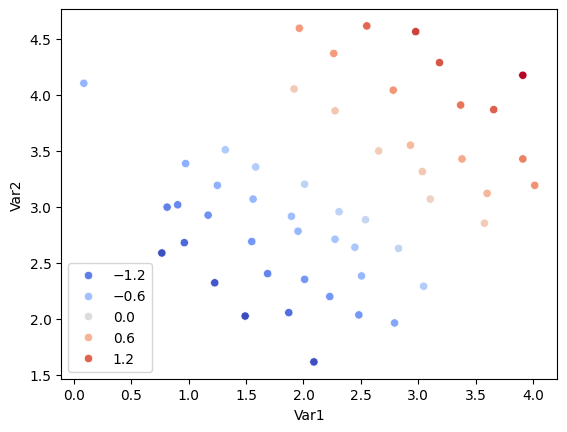

In [99]:
sns.scatterplot( x=X["Var1"],y=X["Var2"],hue= dec,palette = "coolwarm")

y = ax1 + bx2 + c

0 = ax1 + bx2 + c

x2 = -ax1/b - c/b

In [101]:
kmodel = SVC(kernel='rbf', gamma=0.1, C=1)

In [103]:
kmodel.fit(X,y)
predk = kmodel.predict(X)

<Axes: xlabel='Var1', ylabel='Var2'>

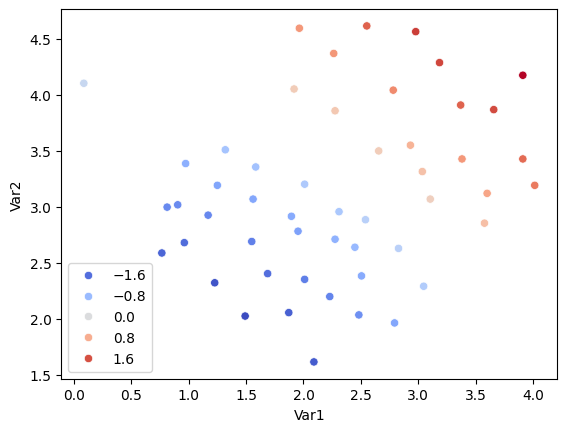

In [104]:
dec = kmodel.decision_function(X)
sns.scatterplot( x=X["Var1"],y=X["Var2"],hue= dec,palette = "coolwarm")

Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels.  We're first tasked with implementing a gaussian kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

## Exercise 2

That result matches the expected value from the exercise.  Next we're going to examine another data set, this time with a non-linear decision boundary.

#### 1. Load the data `ejer_1_data2.mat`

In [ ]:
datos2 = loadmat("ejer_1_data2.mat")
datos2

#### 2. Create a DataFrame with the features and target

In [110]:
X = pd.DataFrame(datos2["X"])
y = pd.DataFrame(datos2["y"])

In [111]:
y.rename(columns={0:"target"},inplace=True)

In [113]:
df2 = pd.concat((X,y),axis=1)

In [114]:
df2.rename(columns={0:"Var1",1:"Var2"},inplace=True)

#### 3. Plot a scatterplot with the data

<Axes: >

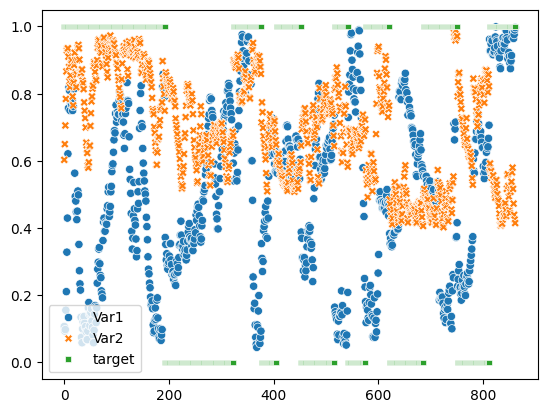

In [115]:
sns.scatterplot(df2)

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [121]:
model_2 = SVC(C=100, gamma=10, probability=True,kernel="rbf")


#### 5. Fit the classifier and get the score

In [122]:
model_2.fit(X,y)

c:\Users\rafac\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, gamma=10, probability=True)

In [123]:
p=model_2.predict(X)

In [124]:
model_2.score(X,y)

0.9698725376593279

#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [139]:
prob =(model_2.predict_proba(X))[:,1]


<Axes: xlabel='Var1', ylabel='Var2'>

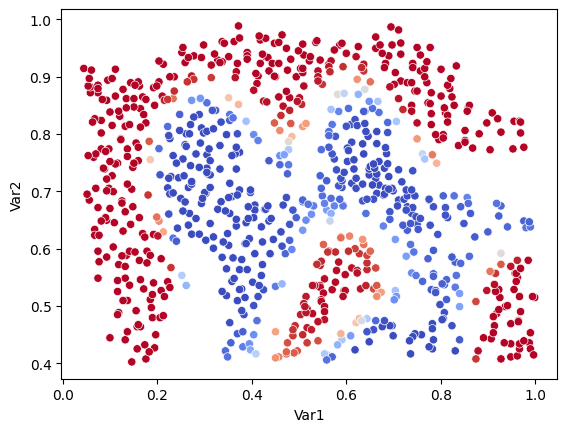

In [142]:
sns.scatterplot(x=df2["Var1"],y=df2["Var2"],c=prob,cmap="coolwarm")